In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from pmdarima.datasets import load_ausbeer

# dados trimestrais
series = load_ausbeer(as_series=True)[:-1]

In [3]:
?load_ausbeer

Signature: load_ausbeer(as_series=False, dtype=<class 'numpy.float64'>)
Docstring:
Quarterly beer production data.

Total quarterly beer production in Australia (in megalitres)
from 1956:Q1 to 2008:Q3

Parameters
----------
as_series : bool, optional (default=False)
    Whether to return a Pandas series. If False, will return a 1d
    numpy array.

dtype : type, optional (default=np.float64)
    The type to return for the array. Default is np.float64, which is used
    throughout the package as the default type.

Returns
-------
rslt : array-like, shape=(n_samples,)
    The ausbeer vector.

Examples
--------
>>> from pmdarima.datasets import load_ausbeer
>>> load_ausbeer()
array([284., 213., 227., 308., 262., 228., 236., 320., 272., 233., 237.,
       313., 261., 227., 250., 314., 286., 227., 260., 311., 295., 233.,
       257., 339., 279., 250., 270., 346., 294., 255., 278., 363., 313.,
       273., 300., 370., 331., 288., 306., 386., 335., 288., 308., 402.,
       353., 316., 325., 4

In [4]:
series.head()

0    284.0
1    213.0
2    227.0
3    308.0
4    262.0
dtype: float64

In [5]:
series.tail()

206    394.0
207    473.0
208    420.0
209    390.0
210    410.0
dtype: float64

<AxesSubplot:>

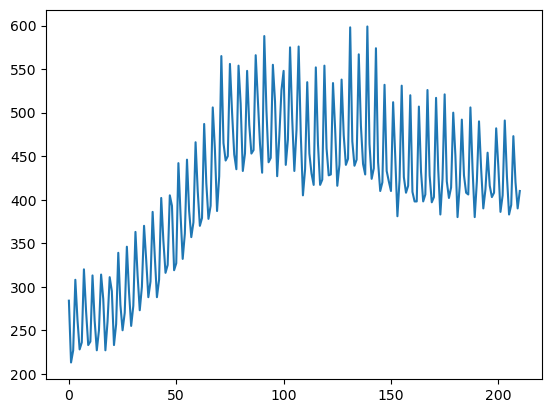

In [6]:
series.plot()

<AxesSubplot:>

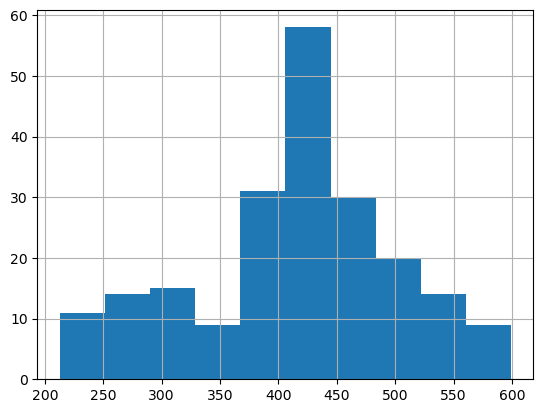

In [7]:
series.hist()

In [8]:
from pmdarima.arima import ndiffs, nsdiffs


# kpss test
ndiffs(series, test='kpss')

1

In [9]:
# augmented dickey-fuller
ndiffs(series, test='adf')

1

In [10]:
# testes para sazonalidade
nsdiffs(series, test='ocsb', m=4)

1

In [11]:
nsdiffs(series, test='ch', m=4)

0

In [12]:
?series.diff

Signature: series.diff(periods: 'int' = 1) -> 'Series'
Docstring:
First discrete difference of element.

Calculates the difference of a Series element compared with another
element in the Series (default is element in previous row).

Parameters
----------
periods : int, default 1
    Periods to shift for calculating difference, accepts negative
    values.

Returns
-------
Series
    First differences of the Series.

See Also
--------
Series.pct_change: Percent change over given number of periods.
Series.shift: Shift index by desired number of periods with an
    optional time freq.
DataFrame.diff: First discrete difference of object.

Notes
-----
For boolean dtypes, this uses :meth:`operator.xor` rather than
:meth:`operator.sub`.
The result is calculated according to current dtype in Series,
however dtype of the result is always float64.

Examples
--------

Difference with previous row

>>> s = pd.Series([1, 1, 2, 3, 5, 8])
>>> s.diff()
0    NaN
1    0.0
2    1.0
3    1.0
4    2.0
5  

<AxesSubplot:>

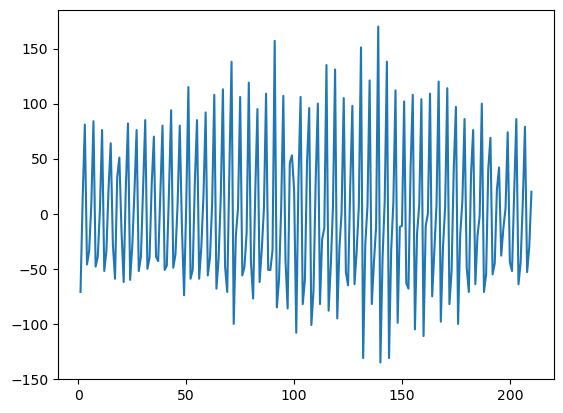

In [13]:
# removendo a tendencia
series.diff(periods=1).plot()

<AxesSubplot:>

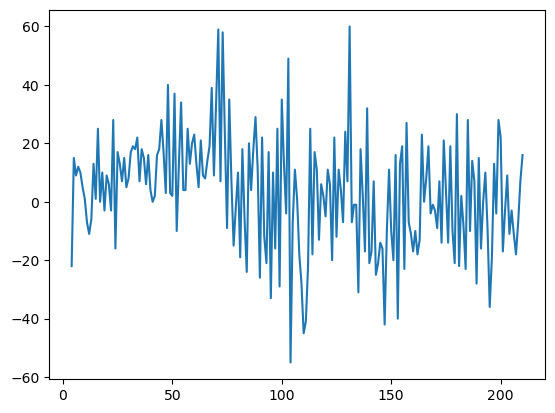

In [14]:
# removendo a sazonalidade
series.diff(periods=4).plot()

<AxesSubplot:>

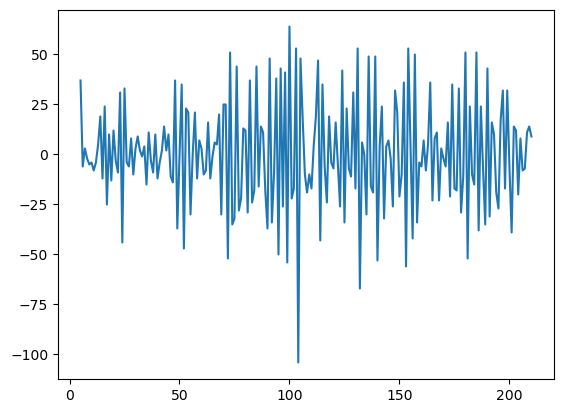

In [15]:
# residuos
series.diff(periods=1).diff(periods=4).plot()

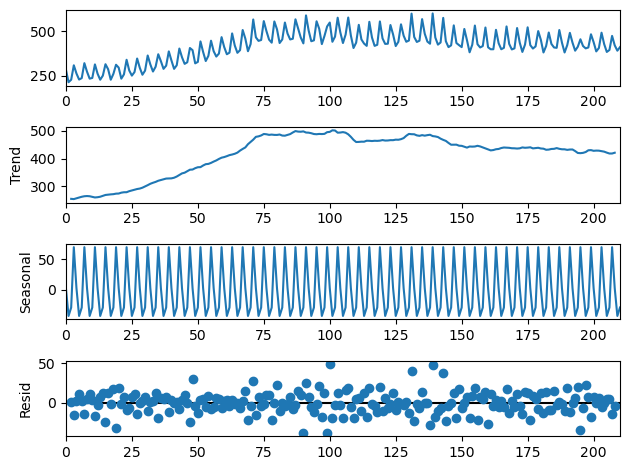

Signature:
seasonal_decompose(
    x,
    model='additive',
    filt=None,
    period=None,
    two_sided=True,
    extrapolate_trend=0,
)
Docstring:
Seasonal decomposition using moving averages.

Parameters
----------
x : array_like
    Time series. If 2d, individual series are in columns. x must contain 2
    complete cycles.
model : {"additive", "multiplicative"}, optional
    Type of seasonal component. Abbreviations are accepted.
filt : array_like, optional
    The filter coefficients for filtering out the seasonal component.
    The concrete moving average method used in filtering is determined by
    two_sided.
period : int, optional
    Period of the series. Must be used if x is not a pandas object or if
    the index of x does not have  a frequency. Overrides default
    periodicity of x if x is a pandas object with a timeseries index.
two_sided : bool, optional
    The moving average method used in filtering.
    If True (default), a centered moving average is computed using 

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(series,
                            model='additive',
                            period=4)

plt = result.plot()
?seasonal_decompose

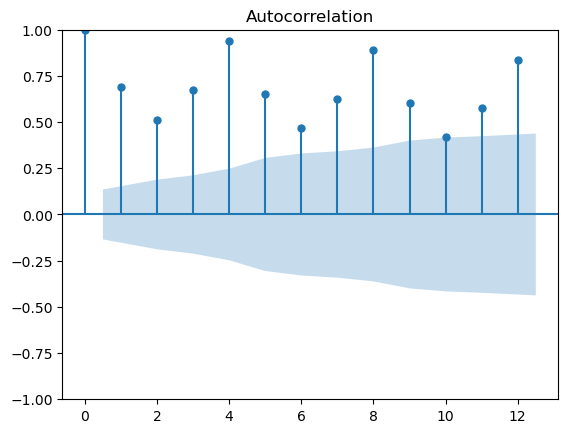

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt = plot_acf(series, lags=12)

/home/dcm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


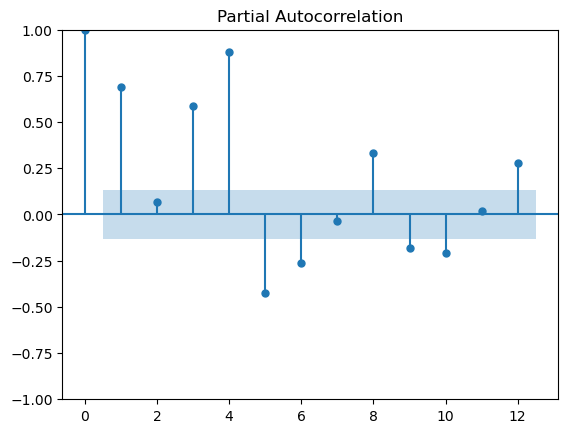

In [18]:
plt = plot_pacf(series, lags=12)

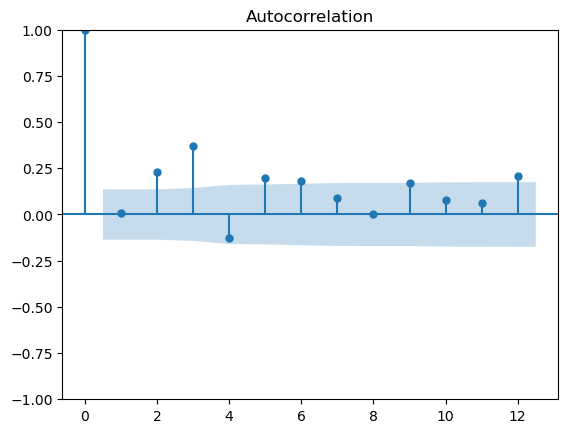

In [19]:
plt = plot_acf(series.diff(periods=4)[4:], lags=12)

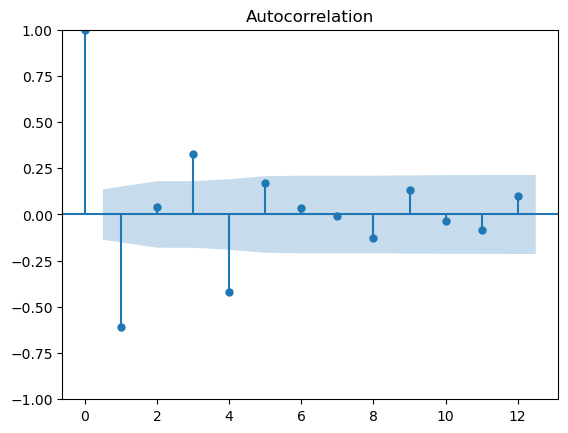

In [20]:
plt = plot_acf(series.diff().diff(periods=4)[5:], lags=12)

In [21]:
import os
os.listdir('..')

['Entrega4C.ipynb',
 'DaviJardim',
 'img',
 '.ipynb_checkpoints',
 'data_dictionary.csv',
 'Entrega4B.ipynb',
 'heart_disease_data.csv',
 'Entrega4.ipynb',
 'm3-Diego.ipynb',
 'DSCPT - Material Tutoring.zip',
 'Binary Classifier - JFK Flights Delay.ipynb',
 'tree3.png',
 'tree2.png',
 'tree1.png',
 'VitorC_curso_series_temporais-main',
 'duv']

In [22]:
# heterocedastidade
from src.heteroskedasticity import het_tests

p_value = het_tests(series, test='white')
# p_value = het_tests(series, test='breuschpagan')

p_value

0.3021558496501833

In [23]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

?boxcox
# box-cox
transformed_data, best_lambda = boxcox(series)

print(transformed_data[:5])
print(series.values[:5])
print(best_lambda)

[2800.01001318 1832.18421604 2012.46633826 3155.70912871 2486.21185538]
[284. 213. 227. 308. 262.]
1.4738012950325772


Signature: boxcox(x, lmbda=None, alpha=None, optimizer=None)
Docstring:
Return a dataset transformed by a Box-Cox power transformation.

Parameters
----------
x : ndarray
    Input array to be transformed.

    If `lmbda` is not None, this is an alias of
    `scipy.special.boxcox`.
    Returns nan if ``x < 0``; returns -inf if ``x == 0 and lmbda < 0``.

    If `lmbda` is None, array must be positive, 1-dimensional, and
    non-constant.

lmbda : scalar, optional
    If `lmbda` is None (default), find the value of `lmbda` that maximizes
    the log-likelihood function and return it as the second output
    argument.

    If `lmbda` is not None, do the transformation for that value.

alpha : float, optional
    If `lmbda` is None and `alpha` is not None (default), return the
    ``100 * (1-alpha)%`` confidence  interval for `lmbda` as the third
    output argument. Must be between 0.0 and 1.0.

    If `lmbda` is not None, `alpha` is ignored.
optimizer : callable, optional
    If `lmbda` 

<AxesSubplot:>

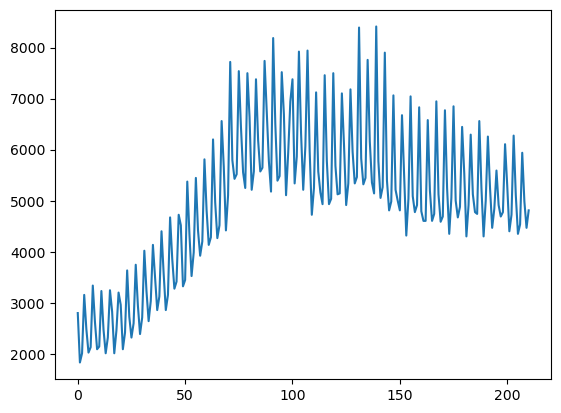

In [24]:
pd.Series(transformed_data).plot()

<AxesSubplot:>

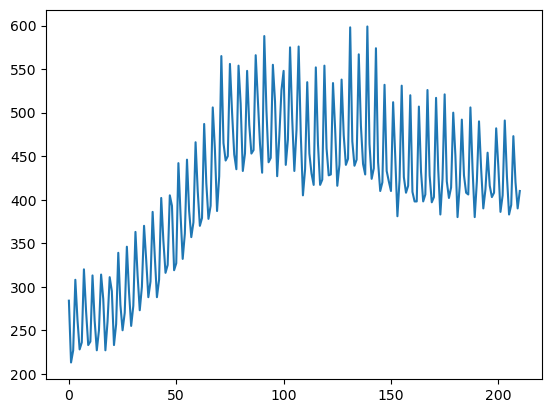

In [25]:
series.plot()

In [26]:
# revertendo
original_series = inv_boxcox(transformed_data, best_lambda)

original_series[:5]

array([284., 213., 227., 308., 262.])

In [27]:
all(np.isclose(original_series, series.values))

True

### Dealing with missing values

<AxesSubplot:>

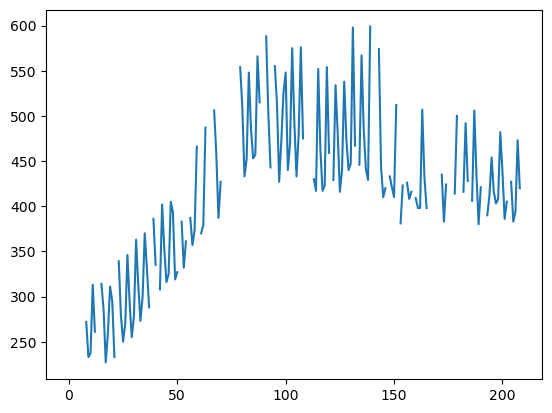

In [28]:
# missing data
series_with_nan = series.copy()

idx = np.random.choice(range(len(series)), size=50, replace=False)

series_with_nan[idx] = np.nan

series_with_nan.plot()

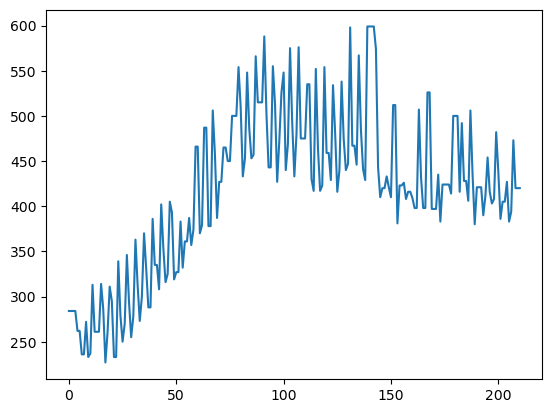

Signature:
series_with_nan.ffill(
    axis: 'None | Axis' = None,
    inplace: 'bool' = False,
    limit: 'None | int' = None,
    downcast=None,
) -> 'Series | None'
Docstring:
Synonym for :meth:`DataFrame.fillna` with ``method='ffill'``.

Returns
-------
Series/DataFrame or None
    Object with missing values filled or None if ``inplace=True``.
File:      ~/anaconda3/lib/python3.9/site-packages/pandas/core/series.py
Type:      method


In [29]:
# ffill: propagate last valid observation forward to next valid 
series_with_nan.ffill().plot()
?series_with_nan.ffill

<AxesSubplot:>

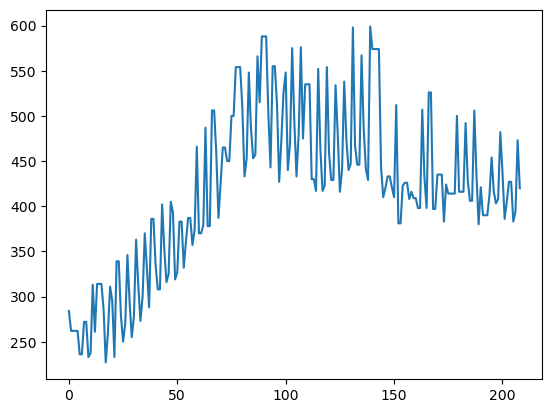

In [30]:
# bfill: use next valid observation to fill gap.
series_with_nan.bfill().plot()

<AxesSubplot:>

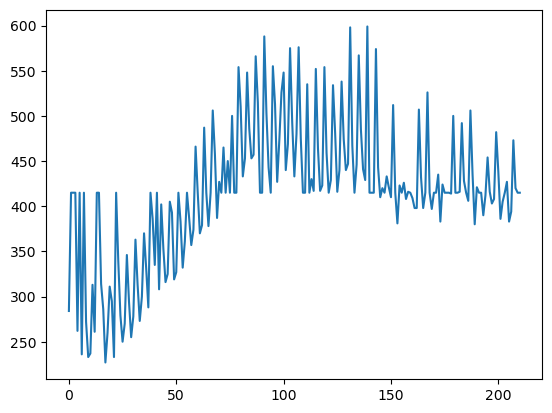

In [31]:
# filling nan with mean
series_with_nan.fillna(series.mean()).plot()

### Dealing with irregular series

In [32]:
# IRREGULAR SERIES
irregular = pd.read_csv('assets/irregular_series.csv')
print(irregular.head())
irregular['Event'] = 'Event'
irregular.set_index('Timestamp', inplace=True)
irregular.index = pd.DatetimeIndex(irregular.index)

irregular.head()

             Timestamp
0  2021-08-14 11:30:00
1  2021-08-14 15:18:00
2  2021-08-14 15:53:00
3  2021-08-14 18:55:00
4  2021-08-15 01:00:00


,Event
Timestamp,
2021-08-14 11:30:00,Event
2021-08-14 15:18:00,Event
2021-08-14 15:53:00,Event
2021-08-14 18:55:00,Event
2021-08-15 01:00:00,Event


In [33]:
irregular.index.date

array([datetime.date(2021, 8, 14), datetime.date(2021, 8, 14),
       datetime.date(2021, 8, 14), ..., datetime.date(2022, 4, 7),
       datetime.date(2022, 4, 7), datetime.date(2022, 4, 7)], dtype=object)

<AxesSubplot:xlabel='index'>

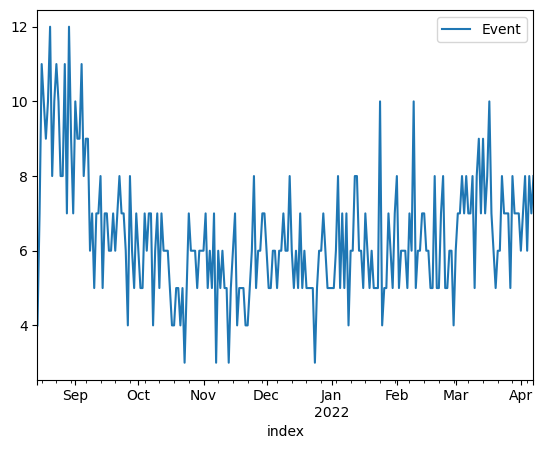

In [34]:
# grouping by date
regular = irregular.groupby(irregular.index.date).count()

# counting zeros
index_range = pd.date_range('2021-08-14', '2022-04-07')
regular = regular.reindex(index_range, fill_value=0)

regular.reset_index().plot.line(x='index', y='Event', rot=0)

In [35]:
regular

,Event
2021-08-14,4
2021-08-15,7
2021-08-16,11
2021-08-17,10
2021-08-18,9
...,...
2022-04-03,8
2022-04-04,6
2022-04-05,8
2022-04-06,7


In [36]:
regular.resample('W').mean()

,Event
2021-08-15,5.500000
2021-08-22,10.000000
2021-08-29,9.571429
2021-09-05,9.000000
2021-09-12,7.142857
2021-09-19,6.571429
2021-09-26,6.428571
2021-10-03,6.000000
2021-10-10,6.285714
2021-10-17,5.571429


In [37]:
?regular.resample

Signature:
regular.resample(
    rule,
    axis=0,
    closed: 'str | None' = None,
    label: 'str | None' = None,
    convention: 'str' = 'start',
    kind: 'str | None' = None,
    loffset=None,
    base: 'int | None' = None,
    on=None,
    level=None,
    origin: 'str | TimestampConvertibleTypes' = 'start_day',
    offset: 'TimedeltaConvertibleTypes | None' = None,
) -> 'Resampler'
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time series.
The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
series/index to the ``on``/``level`` keyword parameter.

Parameters
----------
rule : DateOffset, Timedelta or str
    The offset string or object representing target conversion.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Which axis to use for up- or down-sampling. For `Series` this
    will default to 0, i.e. along the rows. Must b

In [38]:
regular.resample('M').mean()

,Event
2021-08-31,9.111111
2021-09-30,7.133333
2021-10-31,5.548387
2021-11-30,5.466667
2021-12-31,5.645161
2022-01-31,5.967742
2022-02-28,6.107143
2022-03-31,7.129032
2022-04-30,7.142857


### Weekly Seasonality

In [39]:
from pmdarima.datasets import load_gasoline

?load_gasoline

Signature: load_gasoline(as_series=False, dtype=<class 'numpy.float64'>)
Docstring:
Weekly US finished motor gasoline products

A weekly time series of US finished motor gasoline products supplied (in
thousands of barrels per day) from February 1991 to May 2005.

Parameters
----------
as_series : bool, optional (default=False)
    Whether to return a Pandas series. If True, the index will be set to
    the observed years/months. If False, will return a 1d numpy array.

dtype : type, optional (default=np.float64)
    The type to return for the array. Default is np.float64, which is used
    throughout the package as the default type.

Notes
-----
The seasonal periodicity of this example is rather difficult, since it's
not an integer. To be exact, the periodicity is ``365.25 / 7``
(~=52.1785714285714). To fit the best possible model to this data, you'll
need to explore using exogenous features

See Also
--------
:class:`pmdarima.preprocessing.exog.FourierFeaturizer`

Examples
--------
>>

<AxesSubplot:>

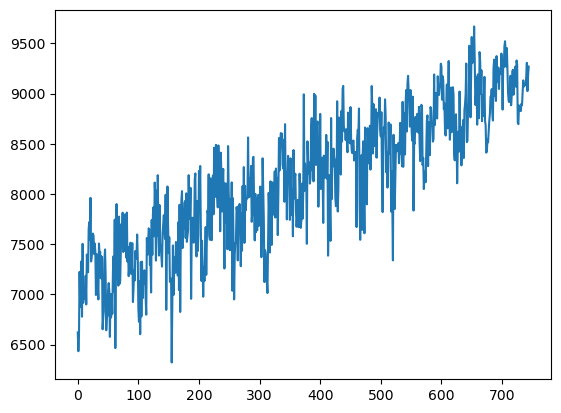

In [40]:
gasoline = load_gasoline(True)
gasoline.plot()

In [41]:
nsdiffs(gasoline, m=52)

0

In [42]:
from pmdarima.datasets import load_wineind

?load_wineind

Signature: load_wineind(as_series=False, dtype=<class 'numpy.float64'>)
Docstring:
Australian total wine sales by wine makers in bottles <= 1 litre.

This time-series records wine sales by Australian wine makers between
Jan 1980 -- Aug 1994. This dataset is found in the R ``forecast`` package.

Parameters
----------
as_series : bool, optional (default=False)
    Whether to return a Pandas series. If True, the index will be set to
    the observed years/months. If False, will return a 1d numpy array.

dtype : type, optional (default=np.float64)
    The type to return for the array. Default is np.float64, which is used
    throughout the package as the default type.

Notes
-----
This is monthly data, so *m* should be set to 12 when using in a seasonal
context.

Examples
--------
>>> from pmdarima.datasets import load_wineind
>>> load_wineind()
array([15136, 16733, 20016, 17708, 18019, 19227, 22893, 23739, 21133,
       22591, 26786, 29740, 15028, 17977, 20008, 21354, 19498, 22125,
      